<a href="https://colab.research.google.com/github/keunsooyoon/ai/blob/main/%EB%B6%93%EA%BD%83%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 붓꽃 분류, 집값 예측, 타이타닉

# 붓꽃 분류 - 지도학습 , 분류 모델의 구조화 , 모델 학습, 성능 개선 프로세스

In [1]:
# 모듈 읽어오기 
import pandas as pd   # 데이터 분석 관련 모듈
import numpy as np    # 데이터 계산 관련 모듈

# iris 데이터 셋 읽어오기
from sklearn import datasets    
iris = datasets.load_iris()

In [2]:
# iris 데이터 셋이 딕셔너리로 구성되어 있으므로 키값들 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris['DESCR'])

# 총 150개(행)의 데이터 , 4개의 피처(열, 설명변수),  3종의 클래스(목표 변수)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
# data 와 target 을 분석하기 쉽게 데이터 프레임으로 변환

df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
# 열이름이 데이터 분석에 적합하지 않으므로 수정
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# df 데이터 프레임에 target 열 추가

df['Target'] = iris['target']
df

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
# 데이터 프레임 기본 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [13]:
# 데이터 프레임 통계 정보 확인 (평균, 표준편차, 최소갑스 최대값 등)
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
# 데이터 프레임 결측치 정보 확인

df.isnull().sum()  # 열마다 각각 결측치의 합계 확인

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

In [15]:
# 데이터 프레임 상관 관계 확인

df.corr()

,sepal_length,sepal_width,petal_length,petal_width,Target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


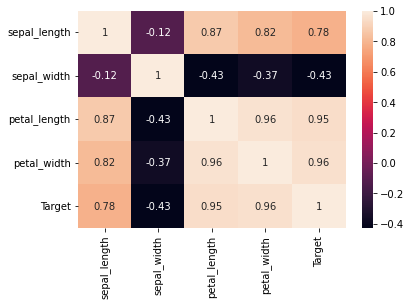

In [17]:
import matplotlib.pyplot as plt     # 파이썬 기본 그림관련 모듈
import seaborn as sns               # 파이썬 추가 그림관련 모듈 

sns.heatmap(data=df.corr(), annot=True)  # annot 상관계수값 함께 출력
plt.show()

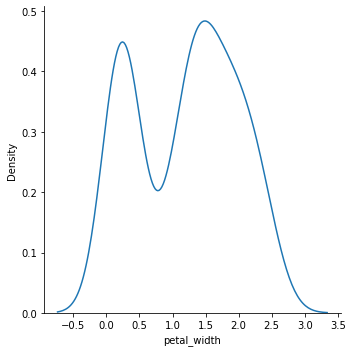

In [19]:
# 정규 분포 성 확인

sns.displot(x='petal_width', kind='kde', data=df)

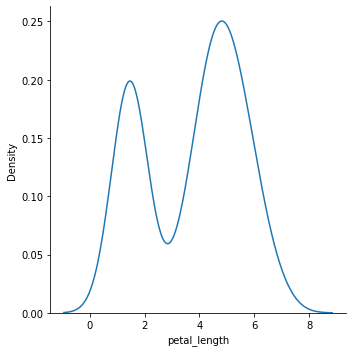

In [20]:
sns.displot(x='petal_length', kind='kde', data=df)

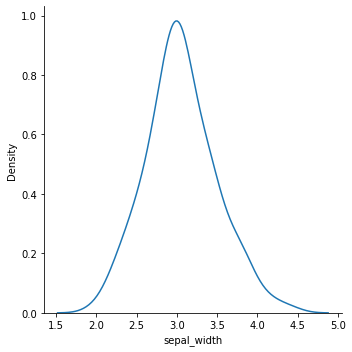

In [21]:
sns.displot(x='sepal_width', kind='kde', data=df)

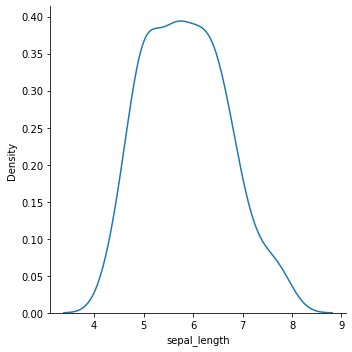

In [22]:
sns.displot(x='sepal_length', kind='kde', data=df)

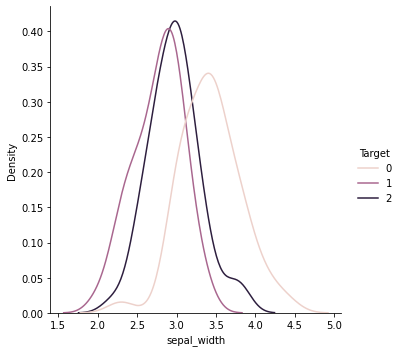

In [23]:
sns.displot(x='sepal_width', kind='kde', hue='Target', data=df)

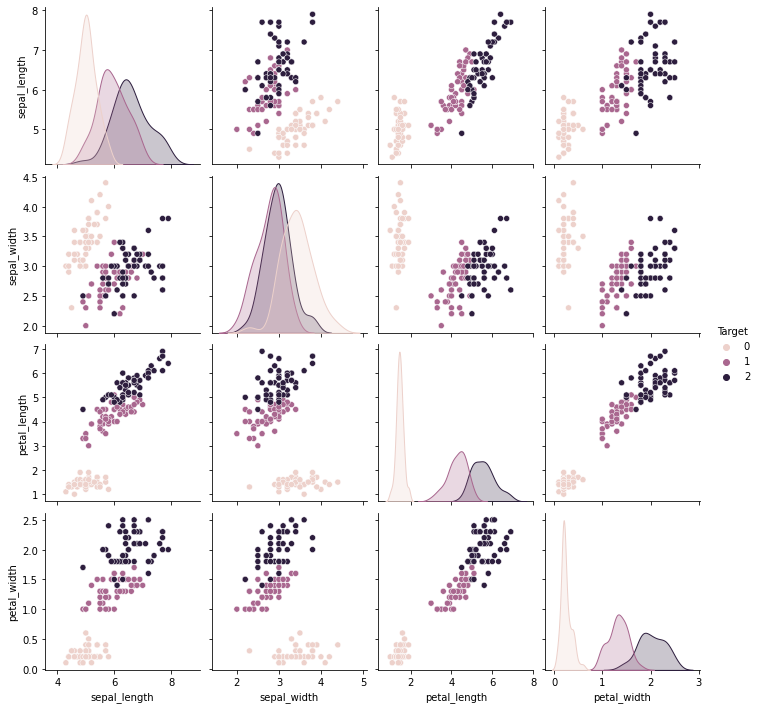

In [24]:
sns.pairplot(df, hue='Target')
plt.show()

In [28]:
# 훈련용 과 검증용 데이터 셋으로 분할


# 먼저 문제지와 답안지로 분리

X_data = df.loc[:,'sepal_length':'petal_width']
y_data = df.loc[:,'Target']

# 훈련용 문제지, 훈련용 답안지, 검증용 문제지, 검증용 답안지로 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size = 0.2,
                                                    shuffle=True,
                                                    random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [ ]:
# KNN SVM DT ...

# KNN, K Nearest Neighbors, 'k 근접 이웃' - 예측하려는 데이터 X가 주어지면 
# 기존 데이터 중에서 비슷한 K개의 이웃을 찾는다. 쉽게 말하면 데이터 X 를 둘러싼
# K개의 가까운 이웃을 찾아 이웃 데이터가 가장 많이 속한 클래스를 예측값으로 결정한다. 
# K 즉 주변의 개수 값에 따라 KNN모델이 예측하는 클래스가 달라진다.  

# K값에 따라 모델의 예측력이 달라지게 되므로 적정한 K값을 설정하는것이 중요하다. 

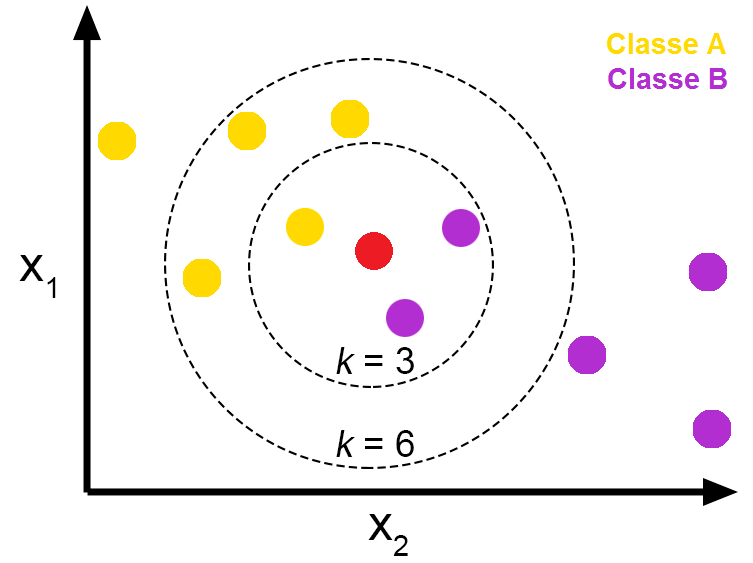

In [38]:


# K값을 설정하는 n_neighbors와 같은 모델의 속성을 하이퍼파라미터라고 부른다. 7이 아닌
# 다른 값을 설정하여 모델의 성능을 개선할 수 있다. 이렇게 하이퍼파라미터값을 바꿔가면서
# 모델의 예측 성능을 개선하는 과정을 하이퍼파라미터 튜닝이라고 한다. 

# 모델 학습
from sklearn.neighbors import KNeighborsClassifier  # KNN 알고리즘 모듈 불러오기
knn = KNeighborsClassifier(n_neighbors = 10)        # 불러온 모듈로 객체 생성
knn.fit(X_train, y_train)                           # 생성된 객체에 훈련용 문제와 정답을 입력하여 모델 완성

# 검증 (예측)
y_pred = knn.predict(X_test)                        # 완성된 모델에 검증용 문제를 입력하여 예측

# 평가
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)                      # 예측한 답안과 정답을 비교하여 정답율을 계산

# n_neighbors = 3     0.9666666666666667
# n_neighbors = 7     0.9666666666666667
# n_neighbors = 10    1.0


0.9666666666666667

In [44]:
print(knn.predict([[5.1,	3.7,	1.4,	0.2]])) 

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# SVM Support Vector Machine 

# 모든 데이터를 공간 내의 좌표에 점으로 표시하고 각 데이터가 속하는 클래스별로 군집을 이룬다고 가정한다. 
# 각 군집 간의 거리를 최대로 유지하는 경계선을 찾아 각 군집을 서로 확연하게 구분짓는다. 
# 이렇게 각 군집을 구분하는 경계선을 찾으면 새로운 데어가 주어졌을때 공간 내의 좌표에서 어느 군집에 속하는지
# 분류할수 있게 된다. 


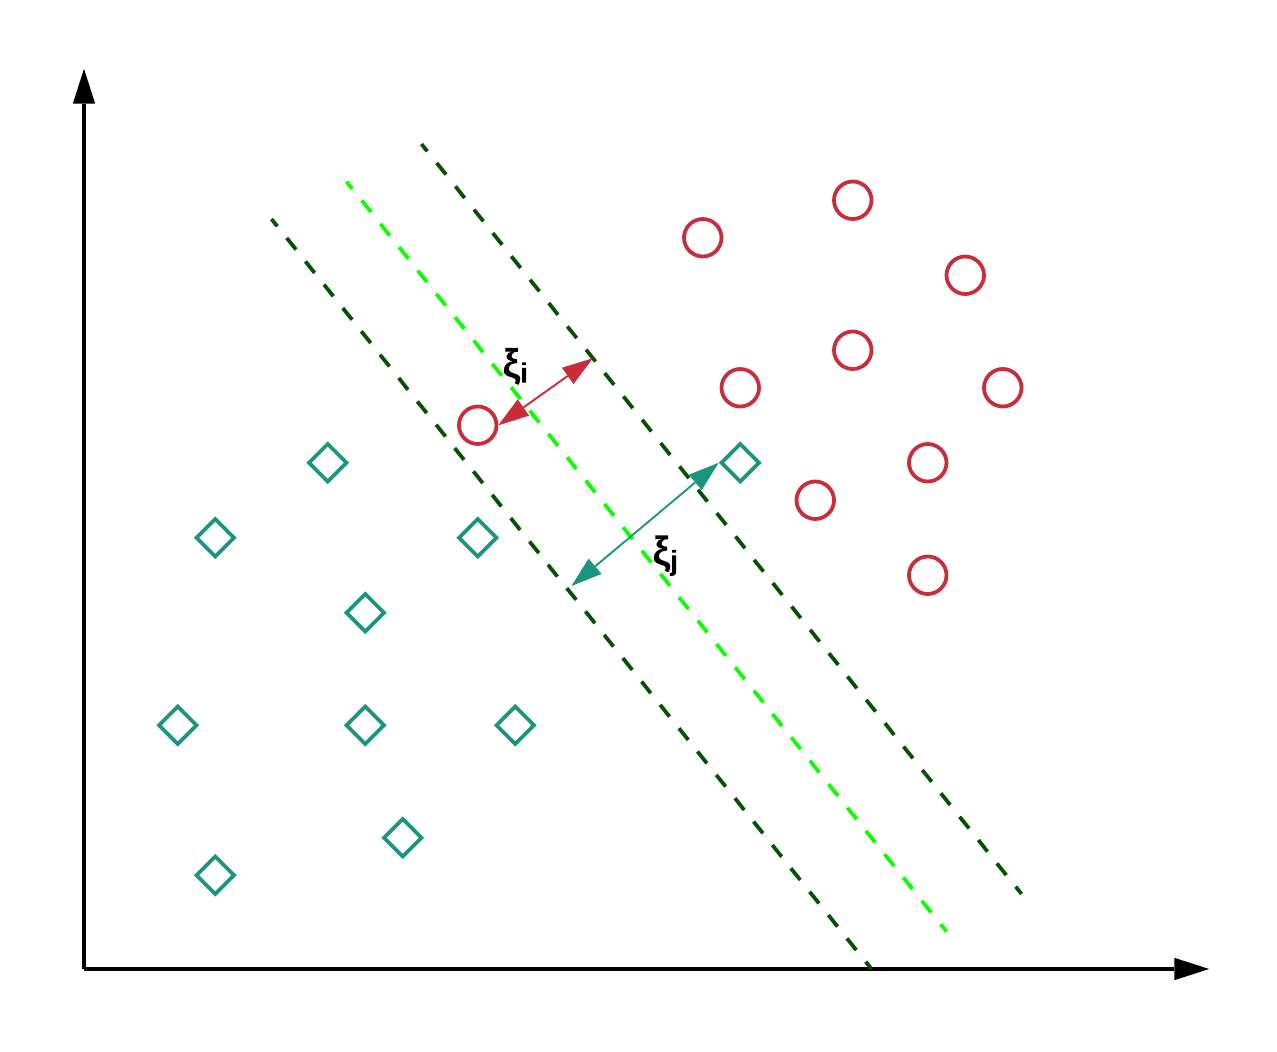

In [45]:
# 모델 학습
from sklearn.svm import SVC     # SVM 알고리즘 모듈 불러오기
svc = SVC(kernel='rbf')         # 불러온 모듈로 객체 생성, 언제나 rbf = Radial Basis Function 곡선 사용
svc.fit(X_train, y_train)       # 생성된 객체에 훈련용 문제와 정답을 입력하여 모델 완성

# 검증 (예측)
y_pred = svc.predict(X_test)    # 완성된 모델에 검증용 문제를 입력하여 예측

# 평가
accuracy_score(y_test, y_pred)  # 예측한 답안과 정답을 비교하여 정답율을 계산

0.9666666666666667

In [46]:
print(svc.predict([[5.1,	3.7,	1.4,	0.2]])) 

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# 로지스틱 회귀 알고리즘 Logistic Regression 

# 시그모이드 함수의 출력값 (0 ~ 1 상이의 실수)을 각 분류 클래스에 속하게 될 확률값으로 사용한다. 
# 붓꽃 데이터 셋을 학습하여 각 품종에 속하는 확률을 0~1 사이의 값으로 계산하여 1에 가까우면 해당 클래스로
# 분류하고 0에 가까우면 아니라고 분류한다. 



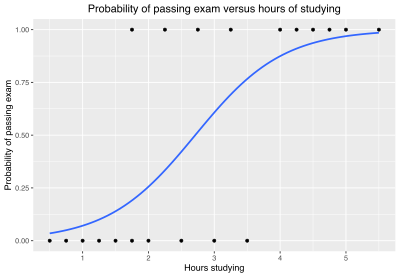

In [47]:
# 모델 학습
from sklearn.linear_model import LogisticRegression     # LR 알고리즘 모듈 불러오기
lrc = LogisticRegression()      # 불러온 모듈로 객체 생성, 
lrc.fit(X_train, y_train)       # 생성된 객체에 훈련용 문제와 정답을 입력하여 모델 완성

# 검증 (예측)
y_pred = lrc.predict(X_test)    # 완성된 모델에 검증용 문제를 입력하여 예측

# 평가
accuracy_score(y_test, y_pred)  # 예측한 답안과 정답을 비교하여 정답율을 계산

1.0

In [48]:
lrc.predict_proba(X_test)

# predict_proba() 매서드를 사용하면 각 클래스에 속할 확률값을 예측한다. 3개의 열과 30개의 행으로 
# 구성된 넘파이 배열로 반환한다. 첫번째 열은 클래스 0의 예측 확률 , 두번째 열은 클래스 1의 예측 확률
# 세번째 열은 클래스 2의 예측 확률이다. 

# 예를 들어 첫 번째 행의 경우는 두 번째 열의 값이 가장 크기 때문에 클래스 1로 분류된다. 

array([[3.57951223e-03, 8.83701352e-01, 1.12719135e-01],
       [1.08397618e-04, 1.44424605e-01, 8.55466997e-01],
       [9.72036719e-01, 2.79631951e-02, 8.59168544e-08],
       [5.72473594e-03, 7.83929849e-01, 2.10345415e-01],
       [9.74356448e-01, 2.56434643e-02, 8.75536479e-08],
       [6.35551928e-02, 9.24611389e-01, 1.18334184e-02],
       [9.32582934e-04, 5.54530221e-01, 4.44537196e-01],
       [2.04391969e-02, 9.48836034e-01, 3.07247694e-02],
       [9.69353760e-01, 3.06461145e-02, 1.25506548e-07],
       [8.52118930e-03, 8.13623709e-01, 1.77855102e-01],
       [1.01049467e-02, 7.24353627e-01, 2.65541426e-01],
       [3.28034369e-04, 1.64167705e-01, 8.35504261e-01],
       [1.82286493e-02, 9.15873889e-01, 6.58974615e-02],
       [9.66428397e-01, 3.35714691e-02, 1.33548451e-07],
       [9.80560454e-01, 1.94394544e-02, 9.15125470e-08],
       [3.57511176e-05, 7.68142061e-02, 9.23150043e-01],
       [1.15318393e-02, 7.47717314e-01, 2.40750847e-01],
       [9.82582250e-01, 1.74176

In [ ]:
# 의사 결정 나무 Decision Tree 

# 트리 알고리즘을 사용하여 트기의 각 분기점에 데이터셋의 피처를 위치시킨다. 각 분기점에서
# 해당 피처에 관한 임의의 조건을 자동으로 설정하여 계속 2개의 줄기로 가지를 나누면서 데이터를 분류한다. 
# 각 분기접에서 분류가 가장 잘되는 최적의 기준을 찾는 과정이 반복되며 중요하다. 

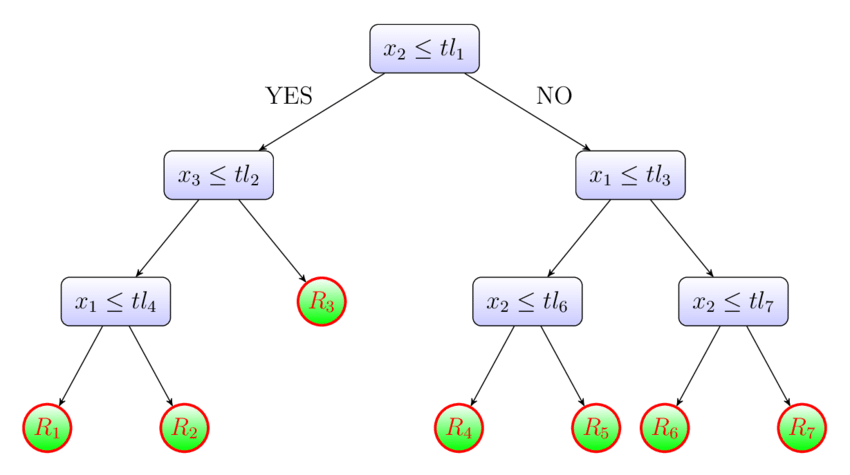

In [58]:
# 모델 학습
from sklearn.tree import DecisionTreeClassifier             # DT 알고리즘 모듈 불러오기
dtc = DecisionTreeClassifier(max_depth = 90, random_state=10)  # 불러온 모듈로 객체 생성, 
dtc.fit(X_train, y_train)       # 생성된 객체에 훈련용 문제와 정답을 입력하여 모델 완성

# 검증 (예측)
y_pred = dtc.predict(X_test)    # 완성된 모델에 검증용 문제를 입력하여 예측

# 평가
accuracy_score(y_test, y_pred)  # 예측한 답안과 정답을 비교하여 정답율을 계산

# max_depth = 3    0.9333333333333333
# max_depth = 5    0.9666666666666667
# max_depth = 10   0.9666666666666667


0.9666666666666667

In [60]:
###############################################################################
# 앙상블 ensemble
###############################################################################

# 앙상블 여러 알고리즘들을 결합하여 성능을 높이는 방법이다. 하나에만 의존하는 것보다는
# 여러 모델의 예측을 종합하면 모델의 예측력은 좋아지게 된다. 

# 여러 알고리즘이 예측한 값을 결합하여 최종 예측값을 결정하는 방법이다. 

# 보팅 voting
# 서로 다른 알고리즘 (knn,svm, dt ...)을 사용하여 모두 같은 데이터 셋을 사용하여 학습을 한 후
# 각각의 알고리즘이 예측한 값 중에서 다수결로 최종 분류 클래스를 정하게 된다. 






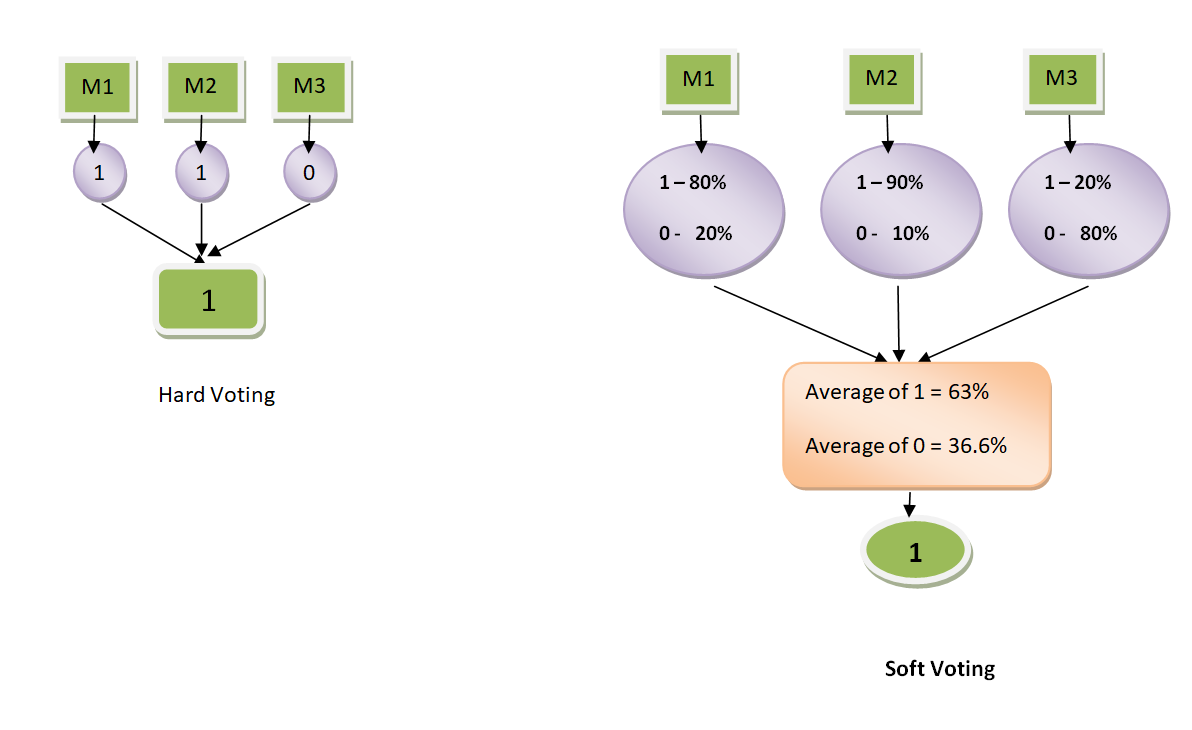


In [61]:

# 모델 학습
from sklearn.ensemble import VotingClassifier             # Voting 알고리즘 모듈 불러오기
hvc = VotingClassifier(estimators = [('KNN',knn),('SVM',svc),('DT',dtc)],
                       voting='hard')  # hard - 다수결,  soft - 확률, 
hvc.fit(X_train, y_train)       # 생성된 객체에 훈련용 문제와 정답을 입력하여 모델 완성

# 검증 (예측)
y_pred = dtc.predict(X_test)    # 완성된 모델에 검증용 문제를 입력하여 예측

# 평가
accuracy_score(y_test, y_pred)  # 예측한 답안과 정답을 비교하여 정답율을 계산


0.9666666666666667

In [ ]:


# bagging  - 예를들면 의사결정나무는 한개의 트리만 사용한다. 그러나 같은 종류의 알고리즘 모델을 
#            여러개 결합하여 예측하는 방법을 배깅이라고 한다. 
#            

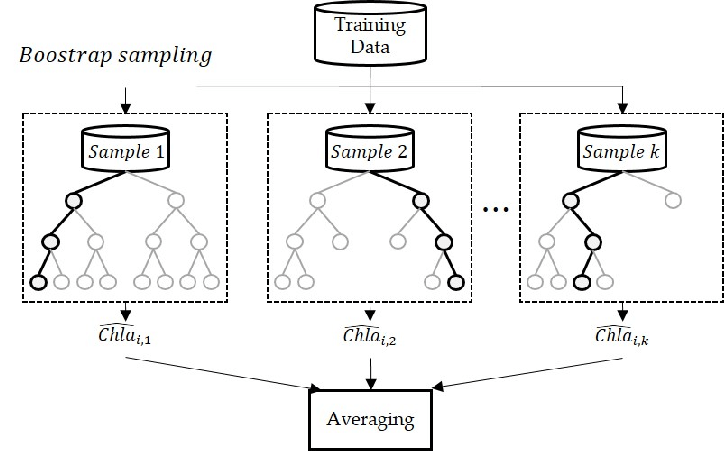

In [62]:
# 모델 학습
from sklearn.ensemble import RandomForestClassifier            # bagging 알고리즘 모듈 불러오기
rfc = RandomForestClassifier(n_estimators = 50, max_depth= 3, random_state=10)  # 객체 생성 
rfc.fit(X_train, y_train)       # 생성된 객체에 훈련용 문제와 정답을 입력하여 모델 완성

# 검증 (예측)
y_pred = rfc.predict(X_test)    # 완성된 모델에 검증용 문제를 입력하여 예측

# 평가
accuracy_score(y_test, y_pred)  # 예측한 답안과 정답을 비교하여 정답율을 계산

1.0